In [2]:
import pandas as pd
from datetime import *
from pandas.tseries.offsets import MonthEnd
import plotly.express as px

# Precio oro diario desde 1968 en EUR USD y GBP

In [6]:
gold = pd.read_excel(r'..\01-Raw_data\01-Gold\03-lbma_gold_pm_usd_1968-01-01_2021-07-22.xlsx')
gold.rename(columns={"DATE": "Date", 'PM USD': 'Value'}, inplace=True)
gold.set_index('Date', inplace=True)
gold.index = pd.to_datetime(gold.index, format='%Y-%m-%d')

In [7]:
gold

,AM USD,Value,AM GBP,PM GBP,AM EUR,PM EUR
Date,,,,,,
2021-07-22,1797.400,1799.45,1308.510,1307.12,1523.84,1523.05
2021-07-21,1805.900,1802.15,1324.810,1317.73,1533.75,1529.30
2021-07-20,1815.300,1823.05,1328.260,1339.21,1538.47,1549.77
2021-07-19,1803.250,1814.90,1314.030,1322.88,1531.32,1535.04
2021-07-16,1822.000,1824.30,1316.030,1321.89,1541.96,1545.73
...,...,...,...,...,...,...
1968-01-08,35.138,NaN,14.586,NaN,NaN,NaN
1968-01-05,35.140,NaN,14.597,NaN,NaN,NaN
1968-01-04,35.141,NaN,14.603,NaN,NaN,NaN


### Se guarda este dataframe como pickle de los precios del oro desde 1968

In [8]:
gold.to_pickle(r'..\02-Data\01-Gold\01_Gold_USD-GBP-EUR_1968-01-02_2021-07-22_daily_lbma.pkl')

# Precio oro mensual desde 1950 en USD

In [9]:
'''gold_prev = pd.read_csv(r'..\01-Raw_Data\01-Gold\gold_price_1950_2020_monthly_datahub.csv')
gold_prev.rename(columns={'Price': 'Value'}, inplace=True)
gold_prev.set_index('Date', inplace=True)
gold_prev.index = pd.to_datetime(gold_prev.index, format='%Y-%m') + MonthEnd(1)'''

"gold_prev = pd.read_csv(r'..\x01-Raw_Data\x01-Gold\\gold_price_1950_2020_monthly_datahub.csv')\ngold_prev.rename(columns={'Price': 'Value'}, inplace=True)\ngold_prev.set_index('Date', inplace=True)\ngold_prev.index = pd.to_datetime(gold_prev.index, format='%Y-%m') + MonthEnd(1)"

In [10]:
'''gold_prev'''

'gold_prev'

### Se guarda este dataframe como pickle de los precios mensuales del oro desde 1950 en USD

In [11]:
'''gold_prev.to_pickle(r'..\02-Data\01-Gold\02_Gold_USD_1950-01-31_2020-07-01_monthly_datahub.pkl')'''

"gold_prev.to_pickle(r'..\x02-Data\x01-Gold\x02_Gold_USD_1950-01-31_2020-07-01_monthly_datahub.pkl')"

# Precio oro anual desde 1791 a 2020 en USD

In [12]:
gold_prev_2 = pd.read_csv(r'..\01-Raw_data\01-Gold\gold_price_1791_2020_yearly_denvergold.csv')

In [13]:
gold_prev_2 = gold_prev_2[['Year', 'Nominal ounce closing price USD']]
gold_prev_2.rename(columns={"Year": "Date", 'Nominal ounce closing price USD': 'Value'}, inplace=True)
gold_prev_2.set_index('Date', inplace=True)
gold_prev_2.index = pd.to_datetime(gold_prev_2.index, format='%Y') + MonthEnd(1)
gold_prev_2.index = gold_prev_2.index.map(lambda x: pd.datetime(x.year, 12, x.day))


<ipython-input-13-0757f7a71613>:5: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [14]:
gold_prev_2

,Value
Date,
1791-12-31,19.390000
1792-12-31,19.390000
1793-12-31,19.390000
1794-12-31,19.390000
1795-12-31,19.390000
...,...
2016-12-31,1248.207705
2017-12-31,1256.455444
2018-12-31,1269.245934


### Se guarda este dataframe como pickle de los precios anules del oro desde 1791 en USD

In [15]:
gold_prev_2.to_pickle(r'..\02-Data\01-Gold\03_Gold_USD_1791-12-31_2020-12-31_yearly_denvergold.pkl')

# Elaboración dataset completo oro

## Lectura datasets

In [16]:
gold = pd.read_pickle(r'..\02-Data\01-Gold\01_Gold_USD-GBP-EUR_1968-01-02_2021-07-22_daily_lbma.pkl')
'''gold_prev = pd.read_pickle(r'..\02-Data\01-Gold\02_Gold_USD_1950-01-31_2020-07-01_monthly_datahub.pkl')'''
gold_prev_2 = pd.read_pickle(r'..\02-Data\01-Gold\03_Gold_USD_1791-12-31_2020-12-31_yearly_denvergold.pkl')

### Filtrado datset gold

In [17]:
gold = gold.drop(['AM USD', 'AM GBP', 'PM GBP', 'AM EUR', 'PM EUR'], axis=1).dropna()
gold

,Value
Date,
2021-07-22,1799.45
2021-07-21,1802.15
2021-07-20,1823.05
2021-07-19,1814.90
2021-07-16,1824.30
...,...
1968-04-05,37.00
1968-04-04,36.95
1968-04-03,37.60


In [18]:
### Filtrado dataset gold_prev

In [19]:
'''mask = (gold_prev.index < datetime.strptime('1968-04-01', '%Y-%m-%d'))
gold_prev = gold_prev.loc[mask]'''

"mask = (gold_prev.index < datetime.strptime('1968-04-01', '%Y-%m-%d'))\ngold_prev = gold_prev.loc[mask]"

In [20]:
'''gold_prev'''

'gold_prev'

### Filtrado dataset gold_prev_2

In [26]:
mask_2 = (gold_prev_2.index < datetime.strptime('1968-04-01', '%Y-%m-%d'))
gold_prev_2 = gold_prev_2.loc[mask_2]
gold_prev_2

,Value
Date,
1791-12-31,19.39
1792-12-31,19.39
1793-12-31,19.39
1794-12-31,19.39
1795-12-31,19.39
...,...
1963-12-31,35.09
1964-12-31,35.10
1965-12-31,35.12


# Se juntan los dataframes filtrados

In [22]:
gold_def = gold.append(gold_prev_2).sort_index().reset_index().set_index('Date')

In [23]:
'''gold_def = gold_def.append(gold_prev_2).sort_index().reset_index().set_index('Date')'''

"gold_def = gold_def.append(gold_prev_2).sort_index().reset_index().set_index('Date')"

In [24]:
gold_def

,Value
Date,
1791-12-31,19.39
1792-12-31,19.39
1793-12-31,19.39
1794-12-31,19.39
1795-12-31,19.39
...,...
2021-07-16,1824.30
2021-07-19,1814.90
2021-07-20,1823.05


In [25]:
gold_def.to_pickle(r'..\02-Data\01-Gold\04_Gold_USD_1791-12-31_2020-07-22_mix.pkl')

# Gold annual change on monthly spot

In [3]:
gold_prev = pd.read_pickle(r'..\02-Data\01-Gold\01_Gold_USD-GBP-EUR_1968-01-02_2021-07-22_daily_lbma.pkl')

In [4]:
gold_prev = gold_prev.drop(columns=['AM USD', 'AM GBP', 'PM GBP', 'AM EUR', 'PM EUR']).dropna()

In [5]:
gold_prev = gold_prev.groupby(gold_prev.index.strftime('%Y-%m')).head(1)

In [6]:
gold_prev = gold_prev.sort_index()

In [7]:
gold_percentage = gold_prev.pct_change(12).dropna()

In [8]:
gold_percentage

,Value
Date,
1969-04-30,0.115090
1969-05-30,0.026818
1969-06-30,0.007335
1969-07-31,0.065380
1969-08-29,0.026633
...,...
2021-03-31,0.051027
2021-04-30,0.038115
2021-05-28,0.099063


In [9]:
gold_percentage.to_pickle(r'..\02-Data\01-Gold\05-Gold_percentage_1968-04_2021-07_monthly_datahub.pkl')

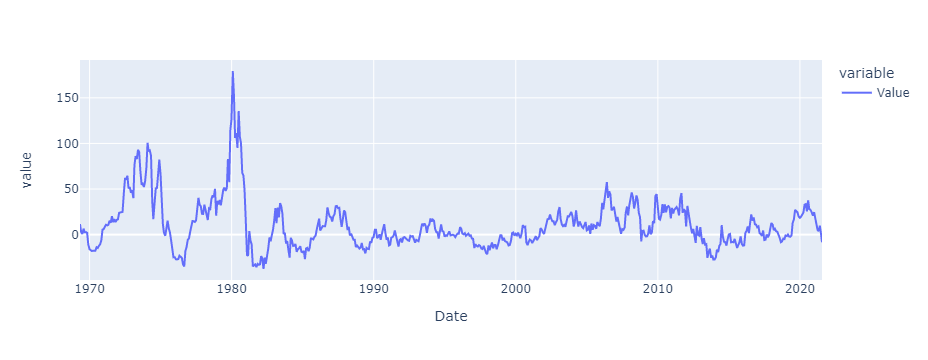

In [223]:
px.line(gold_percentage)